In [30]:
import mysql.connector


In [31]:
connection = mysql.connector.connect(
    host="127.0.0.1",  
    user="lpragada",  
    password="assailed loose tycoon possessor",
    database="lpragada_db"  
)

cursor = connection.cursor()

In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patients (
    Patient_ID VARCHAR(20) PRIMARY KEY,
    Age INT,
    Gender ENUM('MALE', 'FEMALE'),
    Patient_Status ENUM('Alive', 'Dead')
);

""")

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Diagnoses (
    Diagnosis_ID VARCHAR(10) PRIMARY KEY,
    Tumour_Stage VARCHAR(5),
    Histology VARCHAR(50),
    Patient_ID VARCHAR(20),
    FOREIGN KEY (Patient_ID) REFERENCES Patients(Patient_ID)
);
""")

In [6]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Visits (
    Visit_ID VARCHAR(20) PRIMARY KEY,
    Date_of_Surgery DATE,
    Date_of_Last_Visit DATE,
    Patient_ID VARCHAR(20),
    FOREIGN KEY (Patient_ID) REFERENCES Patients(Patient_ID)
);
""")

In [7]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Proteins (
    ProteinID VARCHAR(20) PRIMARY KEY,
    Protein1 FLOAT,
    Protein2 FLOAT,
    Protein3 FLOAT,
    Protein4 FLOAT,
    Diagnosis_ID VARCHAR(10),
    FOREIGN KEY (Diagnosis_ID) REFERENCES Diagnoses(Diagnosis_ID)
);
""")

In [33]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Surgery (
    ID VARCHAR(10) PRIMARY KEY,
    Surgery_type_ID VARCHAR (100),
    Diagnosis_ID VARCHAR(10),
    FOREIGN KEY (Diagnosis_ID) REFERENCES Diagnoses(Diagnosis_ID)
);
""")


In [9]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Surgery_Types (
    Surgery_type_ID INT PRIMARY KEY,
    Surgery_name VARCHAR(100)
);
""")

In [16]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Labs (
    Lab_ID VARCHAR(200) PRIMARY KEY,
    ER_status VARCHAR(10),
    PR_status VARCHAR(10),
    HER2_status VARCHAR(10),
    Diagnosis_ID VARCHAR(10),
    FOREIGN KEY (Diagnosis_ID) REFERENCES Diagnoses(Diagnosis_ID)
);
""")

In [3]:

import csv

In [12]:
import csv

with open('Patients.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        cursor.execute("INSERT INTO Patients (Patient_ID, Age, Gender, Patient_Status) VALUES (%s, %s, %s, %s)", row)

# Commit changes
connection.commit()


In [14]:
with open('Diagnoses.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        cursor.execute("""
            INSERT INTO Diagnoses (Diagnosis_ID, Tumour_Stage, Histology, Patient_ID) 
            VALUES (%s, %s, %s, %s)
        """, row)

# Commit changes
connection.commit()

IntegrityError: 1062 (23000): Duplicate entry 'D1' for key 'PRIMARY'

In [4]:
import csv

In [17]:


with open('Labs.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        cursor.execute("""
            INSERT INTO Labs (Lab_ID, ER_status, PR_status, HER2_status, Diagnosis_ID) 
            VALUES (%s, %s, %s, %s, %s)
        """, row)

# Commit changes
connection.commit()


In [18]:

with open('Proteins.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        cursor.execute("""
            INSERT INTO Proteins (ProteinID, Protein1, Protein2, Protein3, Protein4, Diagnosis_ID) 
            VALUES (%s, %s, %s, %s, %s, %s)
        """, row)

# Commit changes
connection.commit()


In [5]:
import csv
from datetime import datetime  

In [20]:
# Insert data into the Visits table
with open('Visits.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        visit_id = row[0]
        
        # Handle missing or empty dates
        date_of_surgery = row[1].strip()  # Remove extra spaces
        date_of_surgery = (
            datetime.strptime(date_of_surgery, '%d-%m-%Y').strftime('%Y-%m-%d') 
            if date_of_surgery else None
        )
        
        date_of_last_visit = row[2].strip()
        date_of_last_visit = (
            datetime.strptime(date_of_last_visit, '%d-%m-%Y').strftime('%Y-%m-%d') 
            if date_of_last_visit else None
        )
        
        patient_id = row[3]
        
        # Properly indented cursor.execute block
        cursor.execute("""
            INSERT IGNORE INTO Visits (Visit_ID, Date_of_Surgery, Date_of_Last_Visit, Patient_ID) 
            VALUES (%s, %s, %s, %s)
        """, (visit_id, date_of_surgery, date_of_last_visit, patient_id))

# Commit changes
connection.commit()


In [37]:
# Create a cursor object
cursor = connection.cursor()

# Open the CSV file and insert data
with open('Surgery.csv', 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)  # Skip the header row
    for row in csv_reader:
        # Ensure correct mapping of columns
        id_ = row[0].strip()  # ID (string, e.g., 'S1', 'S2')
        surgery_type_id = row[1].strip()  # Surgery_type_ID (string, e.g., '1', '2')
        diagnosis_id = row[2].strip()  # Diagnosis_ID (string, e.g., 'D1', 'D2')

        # Insert the data into the table
        cursor.execute("""
            INSERT INTO Surgery (ID, Surgery_type_ID, Diagnosis_ID)
            VALUES (%s, %s, %s)
        """, (id_, surgery_type_id, diagnosis_id))

# Commit the changes
connection.commit()

In [22]:
cursor = connection.cursor()

# Insert data into the Surgery_Types table
insert_queries = [
    "INSERT INTO Surgery_Types (Surgery_type_ID, Surgery_name) VALUES (1, 'Modified Radical Mastectomy')",
    "INSERT INTO Surgery_Types (Surgery_type_ID, Surgery_name) VALUES (2, 'Lumpectomy')",
    "INSERT INTO Surgery_Types (Surgery_type_ID, Surgery_name) VALUES (3, 'Simple Mastectomy')",
    "INSERT INTO Surgery_Types (Surgery_type_ID, Surgery_name) VALUES (4, 'Other')"
]

for query in insert_queries:
    cursor.execute(query)

# Commit changes
connection.commit()

In [6]:
import pandas as pd

In [7]:
#query1 # Create a cursor object
cursor = connection.cursor()

# Write the SQL query
query = """
WITH ProteinSummary AS (
    SELECT 
        d.Tumour_Stage,
        d.Histology,
        AVG(pr.Protein1) AS Avg_Protein1,
        AVG(pr.Protein2) AS Avg_Protein2,
        AVG(pr.Protein3) AS Avg_Protein3,
        AVG(pr.Protein4) AS Avg_Protein4,
        COUNT(*) AS Total_Patients
    FROM Diagnoses d
    JOIN Proteins pr ON d.Diagnosis_ID = pr.Diagnosis_ID
    GROUP BY d.Tumour_Stage, d.Histology
),
RankedTumorStages AS (
    SELECT 
        Tumour_Stage,
        Histology,
        Avg_Protein1,
        Avg_Protein2,
        Avg_Protein3,
        Avg_Protein4,
        Total_Patients,
        RANK() OVER (PARTITION BY Histology ORDER BY Total_Patients DESC) AS Stage_Rank
    FROM ProteinSummary
)
SELECT 
    Tumour_Stage,
    Histology,
    Avg_Protein1,
    Avg_Protein2,
    Avg_Protein3,
    Avg_Protein4,
    Total_Patients,
    Stage_Rank
FROM RankedTumorStages
WHERE Stage_Rank = 1
ORDER BY Histology, Total_Patients DESC;
"""

# Execute the query and fetch the results
cursor.execute(query)
results = cursor.fetchall()

# Get the column names
columns = [desc[0] for desc in cursor.description]

# Create a pandas DataFrame
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df)

# Close the cursor and connection
cursor.close()
connection.close()

  Tumour_Stage                       Histology  Avg_Protein1  Avg_Protein2  \
0           II   Infiltrating Ductal Carcinoma     -0.043145      0.941891   
1           II  Infiltrating Lobular Carcinoma      0.051042      1.073106   
2           II              Mucinous Carcinoma      0.114430      0.605754   

   Avg_Protein3  Avg_Protein4  Total_Patients  Stage_Rank  
0     -0.041731      0.006162             124           1  
1     -0.154017      0.018415              56           1  
2      0.159706      0.178998               9           1  


In [ ]:
#query2

In [15]:
# Create a cursor object
cursor = connection.cursor()

# Indexing SQL commands
indexing_commands = [
    "CREATE INDEX idx_patient_status ON Patients (Patient_Status);",
    "CREATE INDEX idx_diagnosis_id ON Diagnoses (Diagnosis_ID);",
    "CREATE INDEX idx_tumour_stage ON Diagnoses (Tumour_Stage);",
    "CREATE INDEX idx_protein_diagnosis_id ON Proteins (Diagnosis_ID);"
]

# Execute each indexing command
for command in indexing_commands:
    try:
        cursor.execute(command)
        print(f"Index created successfully: {command}")
    except mysql.connector.Error as err:
        print(f"Error creating index: {err}")

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

Error creating index: 1061 (42000): Duplicate key name 'idx_patient_status'
Error creating index: 1061 (42000): Duplicate key name 'idx_diagnosis_id'
Index created successfully: CREATE INDEX idx_tumour_stage ON Diagnoses (Tumour_Stage);
Error creating index: 1061 (42000): Duplicate key name 'idx_protein_diagnosis_id'


In [20]:
cursor = connection.cursor()

# SQL Query
query = """
WITH ProteinSurvival AS (
    SELECT 
        d.Tumour_Stage,
        p.Patient_Status,
        AVG(pr.Protein1) AS Avg_Protein1,
        AVG(pr.Protein2) AS Avg_Protein2,
        AVG(pr.Protein3) AS Avg_Protein3,
        AVG(pr.Protein4) AS Avg_Protein4,
        COUNT(*) AS Total_Patients
    FROM Patients p
    JOIN Diagnoses d ON p.Patient_ID = d.Patient_ID
    JOIN Proteins pr ON d.Diagnosis_ID = pr.Diagnosis_ID
    GROUP BY d.Tumour_Stage, p.Patient_Status
)
SELECT 
    Tumour_Stage,
    Patient_Status,
    Avg_Protein1,
    Avg_Protein2,
    Avg_Protein3,
    Avg_Protein4,
    Total_Patients,
    ROUND((Total_Patients * 100.0) / SUM(Total_Patients) OVER (PARTITION BY Tumour_Stage), 2) AS Percentage
FROM ProteinSurvival
ORDER BY Tumour_Stage, Patient_Status DESC, Total_Patients DESC;
"""

# Execute the query and fetch results
cursor.execute(query)
results = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Convert the results into a Pandas DataFrame
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df)

# Save to CSV (optional)
df.to_csv('Protein_Survival_Analysis.csv', index=False)

# Close the cursor and connection
cursor.close()
connection.close()

  Tumour_Stage Patient_Status  Avg_Protein1  Avg_Protein2  Avg_Protein3  \
0            I           Dead      0.009211      1.149777     -0.211212   
1            I          Alive     -0.018808      0.973826     -0.156616   
2           II           Dead     -0.098867      1.139979     -0.017360   
3           II          Alive      0.015200      0.920669     -0.077501   
4          III           Dead      0.042052      0.998399     -0.058217   
5          III          Alive     -0.133154      0.823295     -0.097596   

   Avg_Protein4  Total_Patients Percentage  
0     -0.126490              10      15.63  
1      0.068257              54      84.38  
2      0.096950              38      20.11  
3     -0.001839             151      79.89  
4      0.254550              18      22.22  
5     -0.113168              63      77.78  


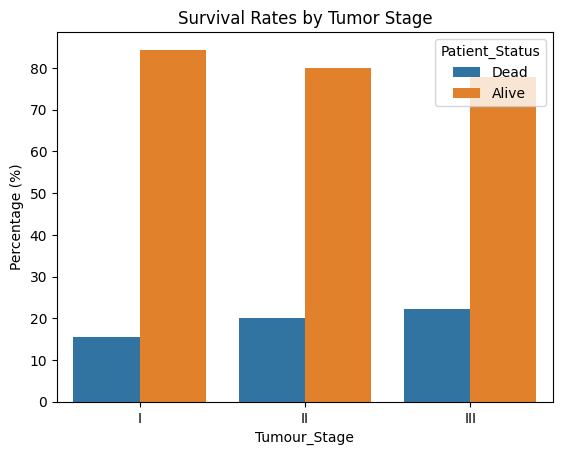

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for survival rates by tumor stage
sns.barplot(x='Tumour_Stage', y='Percentage', hue='Patient_Status', data=df)
plt.title('Survival Rates by Tumor Stage')
plt.ylabel('Percentage (%)')
plt.xlabel('Tumour_Stage')
plt.show()

In [26]:
cursor = connection.cursor()

# SQL query to calculate average protein levels and patient count by tumor stage
query = """
SELECT 
    d.Tumour_Stage,
    AVG(pr.Protein1) AS Avg_Protein1,
    AVG(pr.Protein2) AS Avg_Protein2,
    AVG(pr.Protein3) AS Avg_Protein3,
    AVG(pr.Protein4) AS Avg_Protein4,
    COUNT(*) AS Total_Patients
FROM Diagnoses d
JOIN Proteins pr ON d.Diagnosis_ID = pr.Diagnosis_ID
GROUP BY d.Tumour_Stage
ORDER BY d.Tumour_Stage;
"""

# Execute the query and fetch results
cursor.execute(query)
results = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Convert the results into a Pandas DataFrame
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df)

# Save to CSV (optional)
df.to_csv('Protein_Tumour_Stage.csv', index=False)

# Close the cursor and connection
cursor.close()
connection.close()


  Tumour_Stage  Avg_Protein1  Avg_Protein2  Avg_Protein3  Avg_Protein4  \
0            I     -0.014430      1.001318     -0.165147      0.037828   
1           II     -0.007734      0.964763     -0.065409      0.018023   
2          III     -0.094220      0.862207     -0.088845     -0.031453   

   Total_Patients  
0              64  
1             189  
2              81  


/tmp/ipykernel_433421/860861756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Tumour_Stage', y='Total_Patients', data=df, palette='viridis')


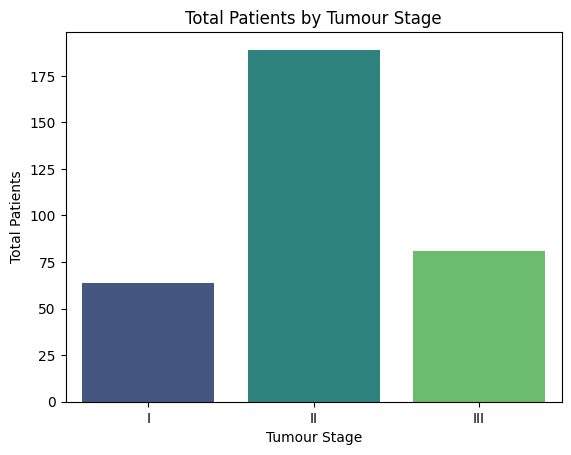

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot: Total Patients by Tumour Stage
sns.barplot(x='Tumour_Stage', y='Total_Patients', data=df, palette='viridis')
plt.title('Total Patients by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Total Patients')
plt.show()

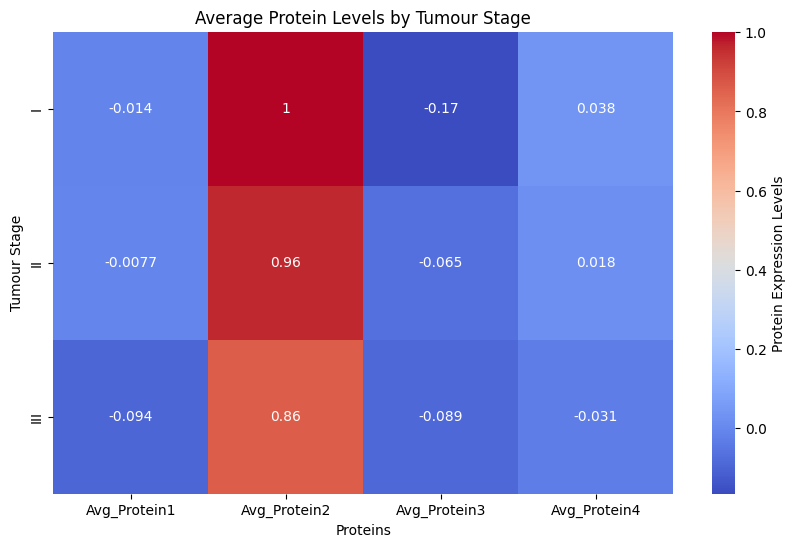

In [29]:
# Prepare the data for a heatmap
protein_df = df[['Tumour_Stage', 'Avg_Protein1', 'Avg_Protein2', 'Avg_Protein3', 'Avg_Protein4']]
protein_df.set_index('Tumour_Stage', inplace=True)

# Heatmap: Average Protein Levels by Tumour Stage
plt.figure(figsize=(10, 6))
sns.heatmap(protein_df, annot=True, cmap='coolwarm', cbar_kws={'label': 'Protein Expression Levels'})
plt.title('Average Protein Levels by Tumour Stage')
plt.xlabel('Proteins')
plt.ylabel('Tumour Stage')
plt.show()

In [32]:
cursor = connection.cursor()

# SQL query to calculate survival rates and protein averages by tumor stage
query = """
SELECT 
    d.Tumour_Stage,
    COUNT(CASE WHEN p.Patient_Status = 'Survived' THEN 1 END) AS Total_Survived,
    COUNT(CASE WHEN p.Patient_Status = 'Deceased' THEN 1 END) AS Total_Deceased,
    ROUND(100.0 * COUNT(CASE WHEN p.Patient_Status = 'Survived' THEN 1 END) / COUNT(*), 2) AS Survival_Rate,
    AVG(pr.Protein1) AS Avg_Protein1,
    AVG(pr.Protein2) AS Avg_Protein2,
    AVG(pr.Protein3) AS Avg_Protein3,
    AVG(pr.Protein4) AS Avg_Protein4
FROM Diagnoses d
JOIN Patients p ON d.Patient_ID = p.Patient_ID
JOIN Proteins pr ON d.Diagnosis_ID = pr.Diagnosis_ID
GROUP BY d.Tumour_Stage
ORDER BY d.Tumour_Stage;
"""

# Execute the query and fetch results
cursor.execute(query)
results = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

# Convert the results into a Pandas DataFrame
df = pd.DataFrame(results, columns=columns)

# Display the DataFrame
print(df)

# Save to CSV (optional)
df.to_csv('Survival_Analysis_By_Tumor_Stage.csv', index=False)

# Close the cursor and connection
cursor.close()
connection.close()

  Tumour_Stage  Total_Survived  Total_Deceased Survival_Rate  Avg_Protein1  \
0            I               0               0          0.00     -0.014430   
1           II               0               0          0.00     -0.007734   
2          III               0               0          0.00     -0.094220   

   Avg_Protein2  Avg_Protein3  Avg_Protein4  
0      1.001318     -0.165147      0.037828  
1      0.964763     -0.065409      0.018023  
2      0.862207     -0.088845     -0.031453  
